## Negative feedback regulation, the Lotka-Voltera model
#### *Alexandros Papagiannakis, PhD, HHMI at Stanford University (Feb 2025)*

<ul style="font-size:25px";> Lets create a simple mathematical model with negative feedback </ul>
<img src="Negative_feedback.png" align="center" width="600"/>

\begin{align}
\frac{dA}{dT} &= \alpha_{A} A - \gamma_{BA}AB
\end{align}

\begin{align}
\frac{dB}{dT} &=  - \delta_{B} B + \gamma_{AB}A
\end{align}

<br> $\alpha$ : auto-activation (replication)
<br> $\beta$ : degradation rate
<br> $\gamma$ : activation/inhibition strength from A to B (AB) or from B to A (BA) respecrively

This model is also known as the Lotka-Voltera model which describes adequately the observed oscillations in the predator-prey population sizes. The replication term $\alpha$ represents the birth rate of the prey, and the degradation term $\delta$ represents the death rate of the predator. The interaction terms $\gamma$ represent the decrease of the prey population or the increase of the predator number due to predation.



In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
import matplotlib


def negative_feedback_ode(t, y, alpha_A, alpha_B, delta_A, delta_B, gamma_BA, gamma_AB):
    A, B = y
    # dA_dt = alpha_A - delta_A * A - gamma_BA * B * A
    dA_dt = alpha_A*A - gamma_BA * B * A
    # dB_dt = alpha_B - delta_B * B + gamma_AB * A * B
    dB_dt = - delta_B * B + gamma_AB * A * B
    
    return [dA_dt, dB_dt]

# Parameters
alpha_A = 10
alpha_B = 0.0001
delta_A = 0.1
delta_B = 5
gamma_BA = 1
gamma_AB = 1

# Initial conditions
A0 = 200  # Initial concentration of A
B0 = 10 # Initial concentration of B
y0 = [A0, B0]

# Time points
t_span = (0, 20)
t_eval = np.linspace(t_span[0], t_span[1], 10000)

# Integrate the ODEs
solution = solve_ivp(negative_feedback_ode, t_span, y0, t_eval=t_eval, args=(alpha_A, alpha_B, delta_A, delta_B, gamma_BA, gamma_AB), method='RK45', atol=1e-6, rtol=1e-6)

gene_A = solution.y[0]
gene_B = solution.y[1]
time = solution.t



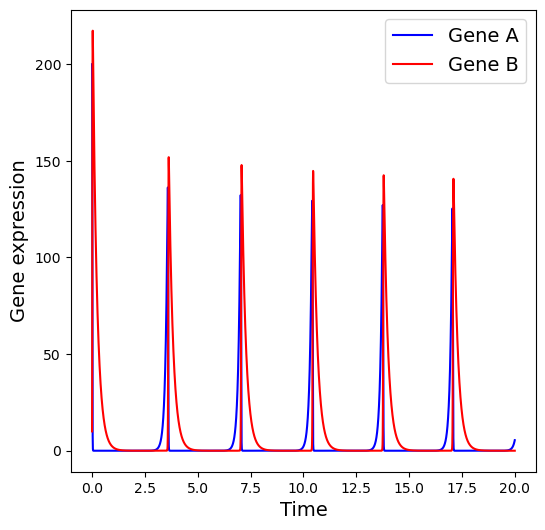

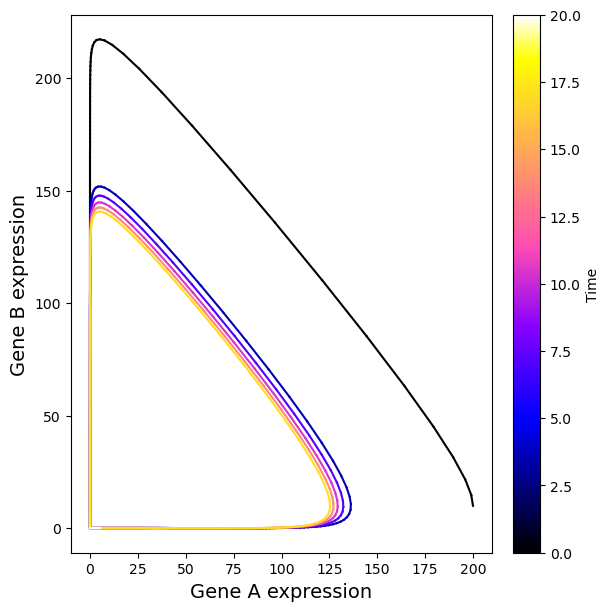

In [14]:
# Plot the results
plt.figure(figsize=(6, 6))
plt.plot(time, gene_A, label="Gene A", color='b')
plt.plot(time, gene_B, label="Gene B", color='r')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Gene expression', fontsize=14)
plt.legend(fontsize=14)
plt.show()

norm = matplotlib.colors.Normalize(vmin=0, vmax=t_span[1], clip=True)
mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap='gnuplot2')
t_color = np.array([(mapper.to_rgba(v/t_eval.shape[0]*t_span[1])) for v in range(t_eval.shape[0])])

fig, ax = plt.subplots(figsize=(6, 6), layout='constrained')
for i in range(gene_A.shape[0]-1):
    plt.plot(gene_A[i:i+2], gene_B[i:i+2], color=t_color[i])
plt.colorbar(mapper, ax=ax, orientation='vertical', label='Time')
plt.xlabel('Gene A expression', fontsize=14)
plt.ylabel('Gene B expression', fontsize=14)
plt.show()


